 Running From: /Users/rambavisetty/anaconda_projects/capstone/notebooks
 Project Root: /Users/rambavisetty/anaconda_projects/capstone
 Raw Data Folder: /Users/rambavisetty/anaconda_projects/capstone/data_raw

📄 Loaded Raw Data:


,supplier,fiscal_year,revenue,COGS,gross_margin_pct,cash_flow,debt_equity_ratio,cost_savings,PPV,QP,...,lead_time_attainment,carbon_emission_intensity,renewable_energy_usage,plastic_recycle,human_rights_compliance_score,node_parity,DDR_gen_support,geo_risk,tariff_risk,chip_shortage_impact
0,Micron,2015,"16,300,000","11,660,000",28.5%,"7,800,000",0.62,10%,-1000,85,...,90%,18.5,7%,80%,91,1,0.1,0.30,0.08,0.08
1,Samsung,2015,"176,500,000","108,892,000",37.5%,"39,000,000,000",0.17,10%,-500,95,...,95%,25.5,5%,78%,90,1,0.2,0.25,0.06,0.08
2,SK Hynix,2015,"16,900,000","12,168,000",28.0%,"8,000,000",0.70,8%,-1500,85,...,90%,24.5,4%,79%,91,1,0.1,0.28,0.07,0.08
3,Micron,2016,"12,400,000","10,210,000",17.6%,"3,100,000",0.70,5%,-1000,85,...,90%,17.9,9%,82%,92,1,0.2,0.30,0.08,0.08
4,Samsung,2016,"177,000,000","109,740,000",38.0%,"45,500,000,000",0.15,7%,-500,95,...,95%,24.0,6%,80%,90,1,0.3,0.25,0.06,0.08



Data Shape: (30, 21)

Columns: ['supplier', 'fiscal_year', 'revenue', 'COGS', 'gross_margin_pct', 'cash_flow', 'debt_equity_ratio', 'cost_savings', 'PPV', 'QP', 'QR', 'lead_time_attainment', 'carbon_emission_intensity', 'renewable_energy_usage', 'plastic_recycle', 'human_rights_compliance_score', 'node_parity', 'DDR_gen_support', 'geo_risk', 'tariff_risk', 'chip_shortage_impact']

 Supplier Names Normalized: ['Micron' 'Samsung' 'SK Hynix']

 Sample After Numeric Cleaning:


,supplier,fiscal_year,revenue,COGS,gross_margin_pct,cash_flow,debt_equity_ratio,cost_savings,PPV,QP,...,lead_time_attainment,carbon_emission_intensity,renewable_energy_usage,plastic_recycle,human_rights_compliance_score,node_parity,DDR_gen_support,geo_risk,tariff_risk,chip_shortage_impact
0,Micron,2015,16300000.0,11660000.0,28.5,7.800000e+06,0.62,10.0,-1000.0,85.0,...,90.0,18.5,7.0,80.0,91.0,1.0,0.1,0.30,0.08,0.08
1,Samsung,2015,176500000.0,108892000.0,37.5,3.900000e+10,0.17,10.0,-500.0,95.0,...,95.0,25.5,5.0,78.0,90.0,1.0,0.2,0.25,0.06,0.08
2,SK Hynix,2015,16900000.0,12168000.0,28.0,8.000000e+06,0.70,8.0,-1500.0,85.0,...,90.0,24.5,4.0,79.0,91.0,1.0,0.1,0.28,0.07,0.08
3,Micron,2016,12400000.0,10210000.0,17.6,3.100000e+06,0.70,5.0,-1000.0,85.0,...,90.0,17.9,9.0,82.0,92.0,1.0,0.2,0.30,0.08,0.08
4,Samsung,2016,177000000.0,109740000.0,38.0,4.550000e+10,0.15,7.0,-500.0,95.0,...,95.0,24.0,6.0,80.0,90.0,1.0,0.3,0.25,0.06,0.08



 Missing Values Summary:


supplier                         0
fiscal_year                      0
revenue                          0
COGS                             0
gross_margin_pct                 0
cash_flow                        0
debt_equity_ratio                0
cost_savings                     0
PPV                              0
QP                               0
QR                               0
lead_time_attainment             0
carbon_emission_intensity        0
renewable_energy_usage           0
plastic_recycle                  0
human_rights_compliance_score    0
node_parity                      0
DDR_gen_support                  0
geo_risk                         0
tariff_risk                      0
chip_shortage_impact             0
dtype: int64


 Saved Clean Historical Features → /Users/rambavisetty/anaconda_projects/capstone/data_processed/historical_features_clean.csv


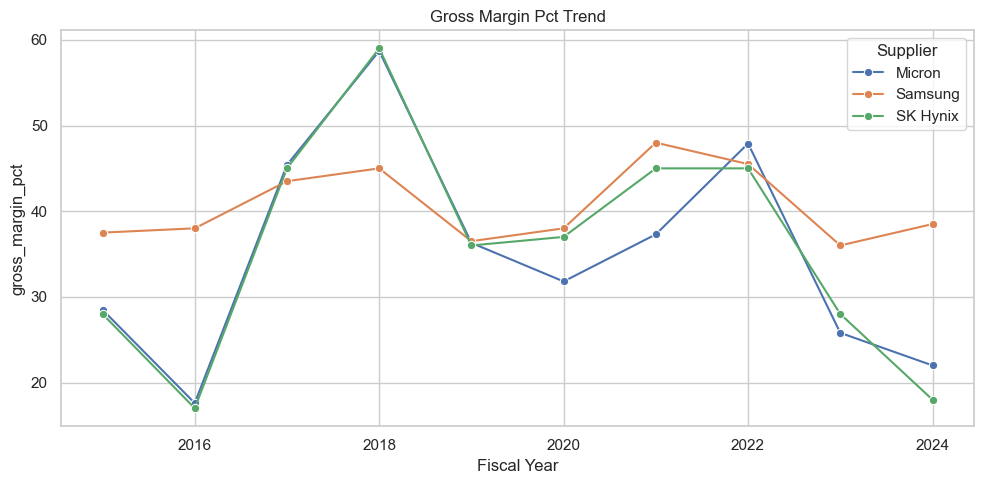

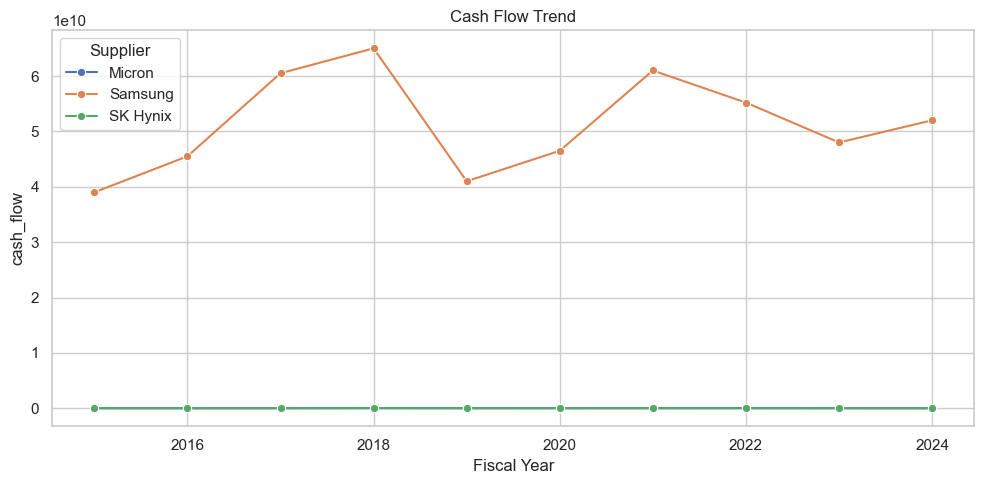

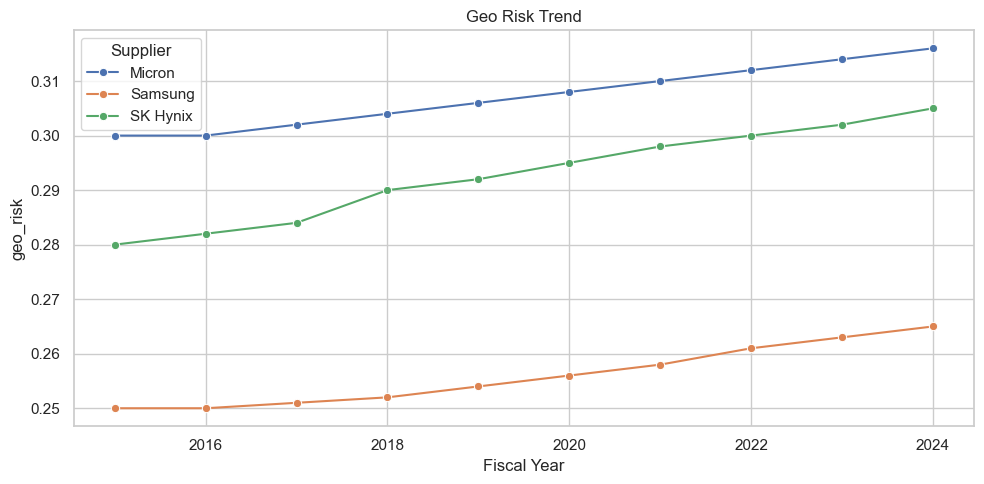

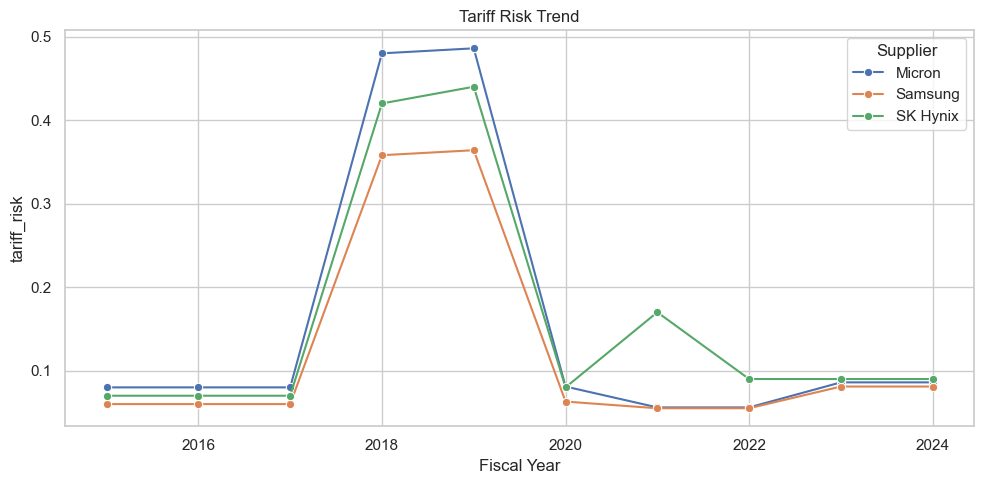

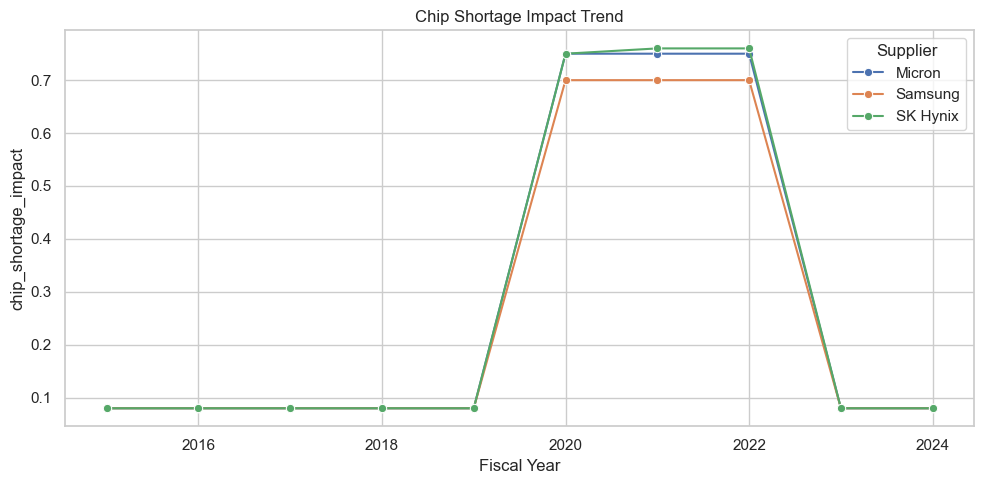

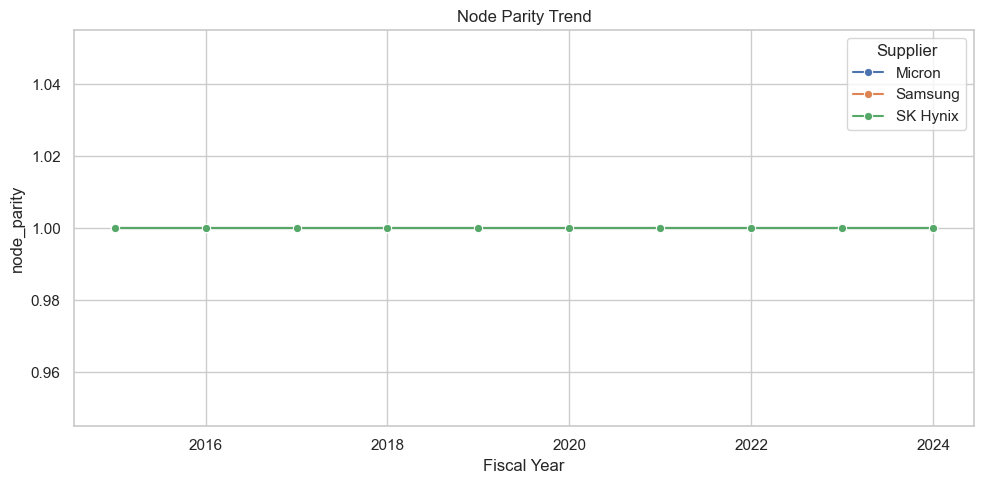

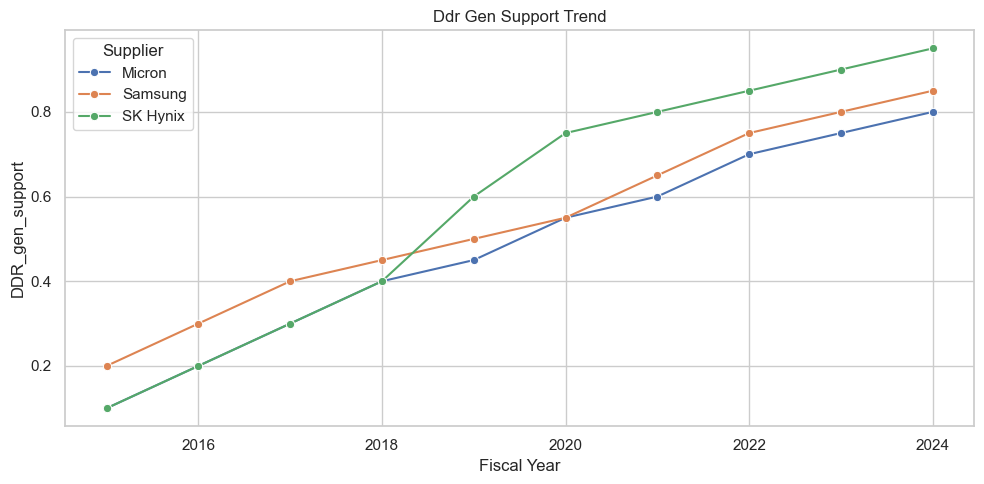

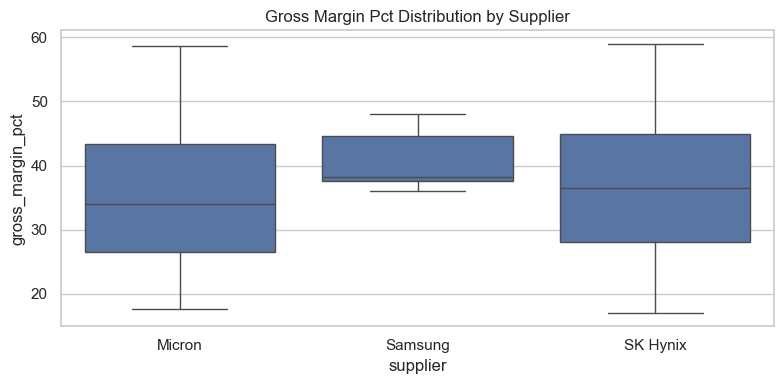

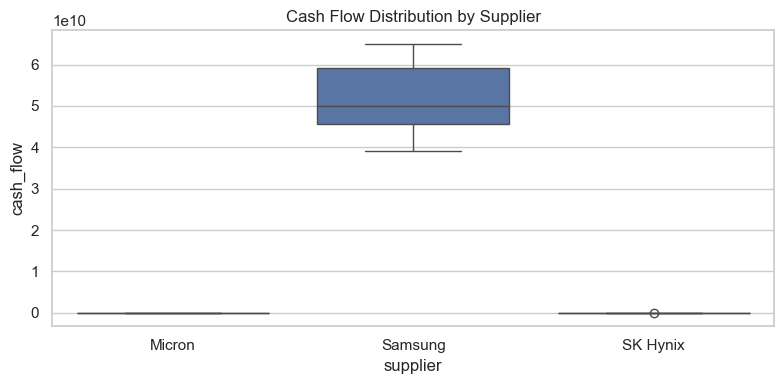

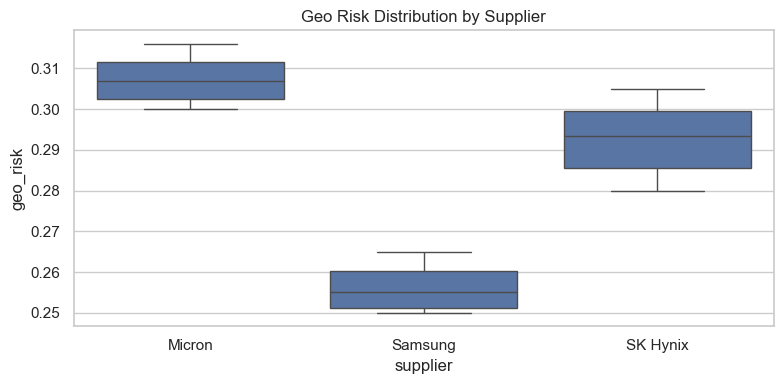

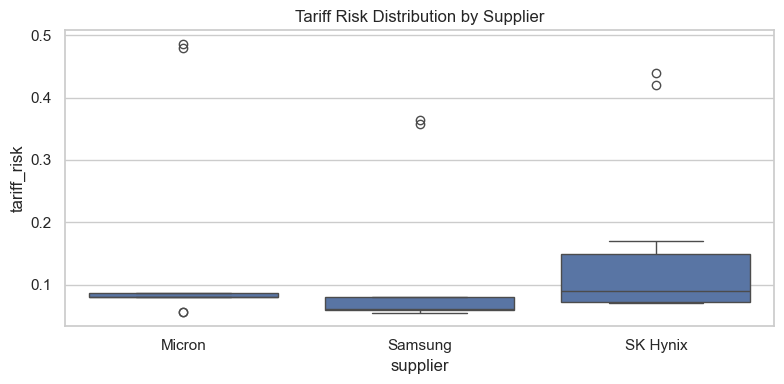

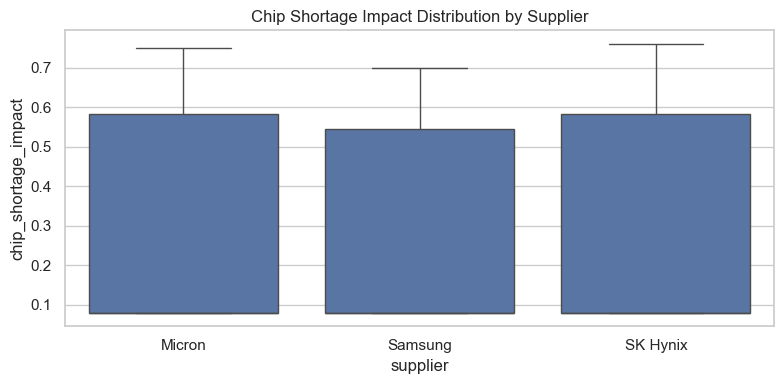

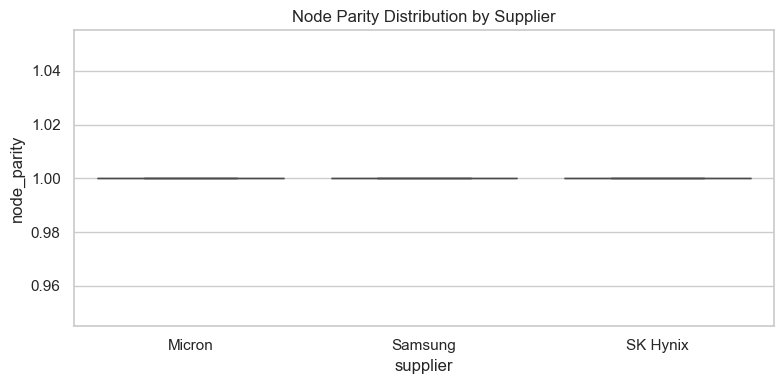

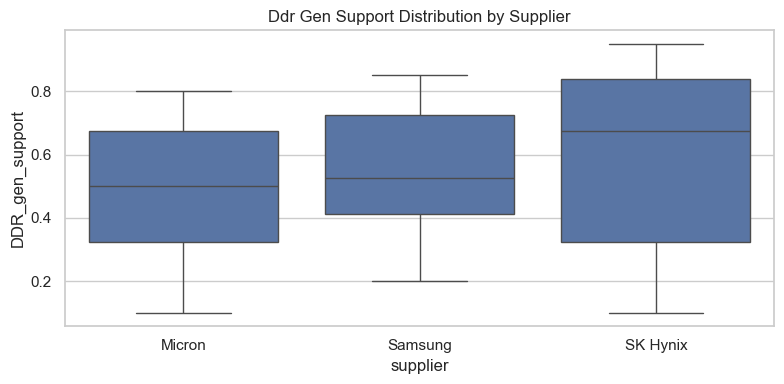

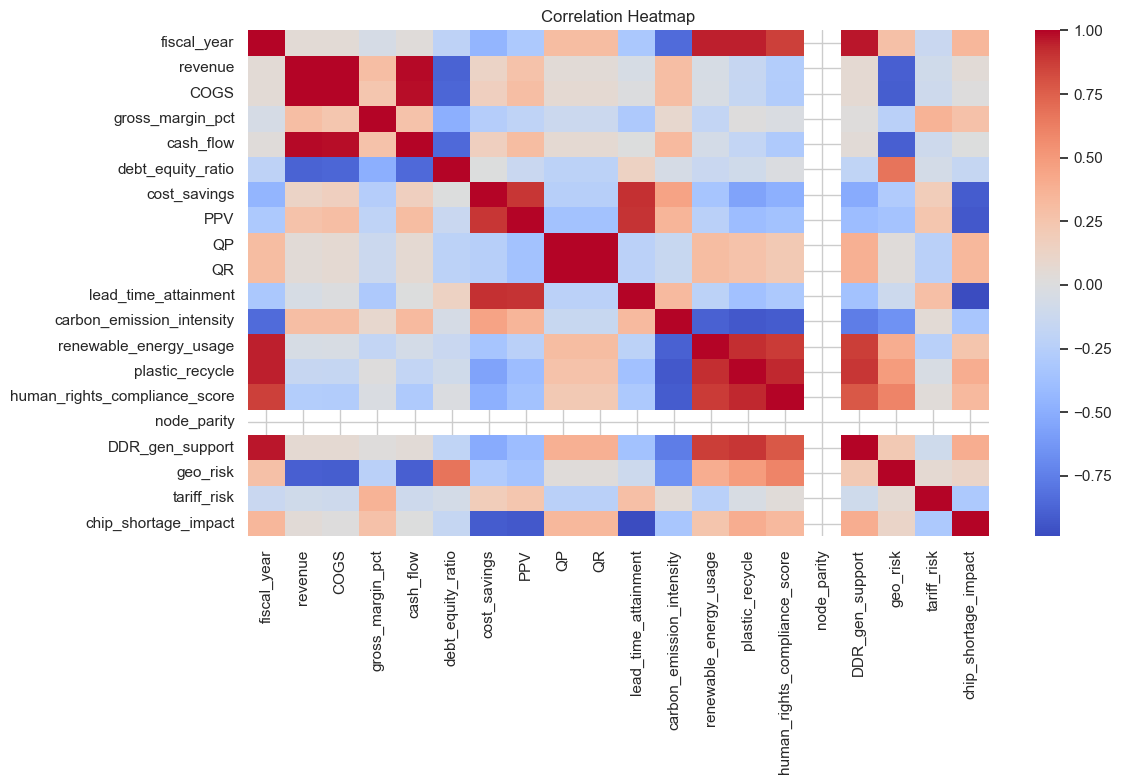


 All EDA visualizations saved under: /Users/rambavisetty/anaconda_projects/capstone/reports

 EDA Notebook Completed Successfully!


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# ============================================================
#  EDA NOTEBOOK: Historical Supplier Data
#  Cleans + transforms + explores data
#  Produces: historical_features_clean.csv
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# ------------------------------------------------------------
# 1. Resolve Project Root (Works from root/ or notebooks/)
# ------------------------------------------------------------
CURRENT_DIR = Path.cwd()

# If data_raw exists in current dir → running from project root
# Else → running from notebooks/, so move one level up
PROJECT_ROOT = CURRENT_DIR if (CURRENT_DIR / "data_raw").exists() else CURRENT_DIR.parent

DATA_RAW = PROJECT_ROOT / "data_raw"
DATA_PROCESSED = PROJECT_ROOT / "data_processed"
REPORTS = PROJECT_ROOT / "reports"

DATA_PROCESSED.mkdir(exist_ok=True)
REPORTS.mkdir(exist_ok=True)

print(" Running From:", CURRENT_DIR)
print(" Project Root:", PROJECT_ROOT)
print(" Raw Data Folder:", DATA_RAW)

# ------------------------------------------------------------
# 2. Load Raw Historical Data
# ------------------------------------------------------------
raw_file = DATA_RAW / "historical_supplier_raw_data.csv"
df = pd.read_csv(raw_file)

print("\n📄 Loaded Raw Data:")
display(df.head())

print("\nData Shape:", df.shape)
print("\nColumns:", list(df.columns))

# ------------------------------------------------------------
# 3. Supplier Normalization
# ------------------------------------------------------------
supplier_map = {
    "Micron Technology": "Micron",
    "Micron Technology Inc": "Micron",
    "Micron Technology, Inc.": "Micron",
    "Micron": "Micron",

    "Samsung Electronics": "Samsung",
    "Samsung Electronics Co., Ltd.": "Samsung",
    "Samsung Electronics Co., Ltd. and its subsidiaries": "Samsung",
    "Samsung": "Samsung",

    "SK hynix": "SK Hynix",
    "SK hynix Inc.": "SK Hynix",
    "Consolidated (K-IFRS)": "SK Hynix",
    "SK Hynix": "SK Hynix"
}

df["supplier"] = df["supplier"].astype(str).replace(supplier_map)

print("\n Supplier Names Normalized:", df["supplier"].unique())

# ------------------------------------------------------------
# 4. Clean Numeric Columns (Remove % , Symbols)
# ------------------------------------------------------------

def clean_numeric(series):
    return (
        series.astype(str)
        .str.replace(",", "", regex=False)
        .str.replace(r"[^\d.\-]", "", regex=True)
        .replace("", np.nan)
        .astype(float)
    )

numeric_cols = [
    "gross_margin_pct", "cash_flow", "debt_equity_ratio",
    "revenue", "COGS",
    "cost_savings", "PPV", "QP", "QR",
    "lead_time_attainment",
    "carbon_emission_intensity",
    "renewable_energy_usage", "plastic_recycle",
    "human_rights_compliance_score",
    "node_parity", "DDR_gen_support", "geo_risk",
    "tariff_risk", "chip_shortage_impact",
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])

print("\n Sample After Numeric Cleaning:")
display(df.head())

# ------------------------------------------------------------
# 5. Missing Value Summary
# ------------------------------------------------------------
print("\n Missing Values Summary:")
display(df.isnull().sum())

# ------------------------------------------------------------
# 6. Save Clean Feature Table
# ------------------------------------------------------------
clean_file = DATA_PROCESSED / "historical_features_clean.csv"
df.to_csv(clean_file, index=False)

print("\n Saved Clean Historical Features →", clean_file)

# ------------------------------------------------------------
# 7. EDA Visualizations (Saved Under /reports)
# ------------------------------------------------------------

sns.set_theme(style="whitegrid")

# -------------------------------
# Trend Charts Over Time
# -------------------------------
def plot_trend(col, title=None, ylabel=None):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x="fiscal_year", y=col, hue="supplier", marker="o")
    plt.title(title or f"{col} Trend Over Time")
    plt.ylabel(ylabel or col)
    plt.xlabel("Fiscal Year")
    plt.legend(title="Supplier")
    plt.tight_layout()
    plt.savefig(REPORTS / f"trend_{col}.png")
    plt.show()

trend_cols = [
    "gross_margin_pct", "cash_flow", "debit_equity_ratio",
    "geo_risk", "tariff_risk", "chip_shortage_impact",
    "node_parity", "DDR_gen_support"
]

for col in trend_cols:
    if col in df.columns:
        plot_trend(col, title=f"{col.replace('_',' ').title()} Trend")

# -------------------------------
# Distribution Plots
# -------------------------------
def plot_distribution(col):
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x="supplier", y=col)
    plt.title(f"{col.replace('_',' ').title()} Distribution by Supplier")
    plt.tight_layout()
    plt.savefig(REPORTS / f"box_{col}.png")
    plt.show()

for col in trend_cols:
    if col in df.columns:
        plot_distribution(col)

# -------------------------------
# Correlation Heatmap
# -------------------------------
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(REPORTS / "correlation_heatmap.png")
plt.show()

print("\n All EDA visualizations saved under:", REPORTS)
print("\n EDA Notebook Completed Successfully!")
